In [ ]:
#!pip install -q google_play_scraper
!pip install -q plotly-express
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

In [ ]:
import pandas as pd
import numpy as np
import regex as re
#from google_play_scraper import app, Sort, reviews_all
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
#from gensim import corpora
#from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk

In [ ]:
daraz_app = reviews_all('com.daraz.android',sleep_milliseconds=0,lang='en',  country='BD', sort=Sort.NEWEST) #Sort.MOST_RELEVANT  country='US',

In [ ]:
daraz_df=pd.json_normalize(daraz_app)

In [ ]:
dataset.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,appName
0,83304c81-5db7-45c9-88c7-47c215458614,Provat Kumar Subir,https://play-lh.googleusercontent.com/a/ACg8oc...,baja app,1,0,10.0.0,2023-11-05 06:05:42,None,NaT,10.0.0,Pathao
1,d4e5113e-595b-446c-8055-ee42ac4245cc,afzal shuvo,https://play-lh.googleusercontent.com/a/ACg8oc...,Good app,5,0,10.0.0,2023-11-04 20:06:15,"Hello afzal shuvo, we are pleased to know that...",2023-11-05 03:33:12,10.0.0,Pathao
2,9e8e8114-ad86-458b-be32-7c45c5392c21,Yousuf Ahmed,https://play-lh.googleusercontent.com/a-/ALV-U...,Good,5,0,10.0.0,2023-11-04 17:58:02,"Hello Yousuf Ahmed, we are pleased to know tha...",2023-11-05 03:32:08,10.0.0,Pathao
3,4f8c425b-abee-4498-983b-cf6e5886525e,Israth Jahan,https://play-lh.googleusercontent.com/a-/ALV-U...,Nowadays it’s became a total disaster. The rid...,1,0,10.0.0,2023-11-04 15:45:09,"Hello Israth Jahan, we are sorry for any diffi...",2023-11-05 03:31:28,10.0.0,Pathao
4,2731d2fd-91da-463c-b530-303de97094b4,406_Tanvir_Tareq_piash,https://play-lh.googleusercontent.com/a-/ALV-U...,Great,5,0,10.0.0,2023-11-04 13:04:29,"Hello Tanvir_Tareq_piash, we are pleased to kn...",2023-11-04 13:43:03,10.0.0,Pathao


In [ ]:
foodpanda_df['appName']="Foodpanda"

In [ ]:
daraz_df['appName']="Daraz"

## full dataset

In [ ]:
dataset['appName'].value_counts()

Foodpanda                1112174
Daraz                    1021852
bKash                     430777
MyGP                      237668
My Robi                   144597
inDrive                   140845
Nagad                     109367
Ridmik Keyboard            97121
My Airtel                  87461
Toffee                     67690
NID Wallet                 62192
MyBL                       54763
Skitto                     52619
10 Minute School           44417
Bioscope Live              30708
Pathao                     26434
Bikroy                     24725
Rocket                     24316
Upay                       16892
DIMS                       15587
Tallykhata                 14134
Prothom Alo                 8932
Citytouch                   8788
Bdjobs                      8282
Swap                        7876
Chorki                      7210
Shohoz                      6754
Bangladeshi Matrimony       5514
Obhai                       5473
Surokkha                    5331
Shikho    

In [ ]:
len(dataset)

3911637

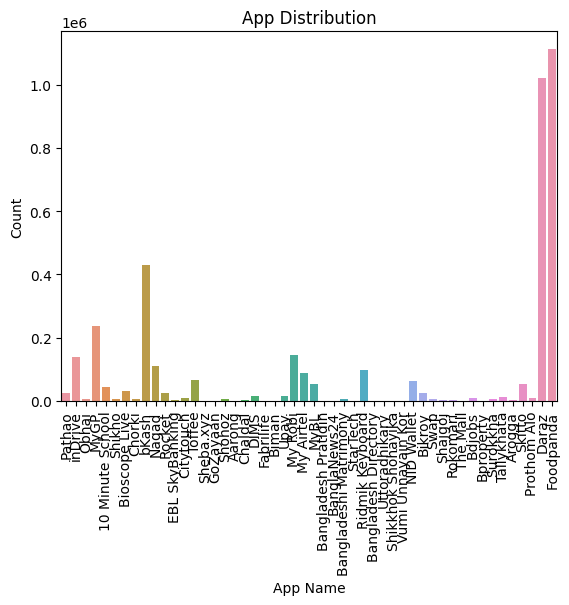

In [ ]:
  # Set the size of the plot
sns.countplot(data=dataset, x="appName")

# Customize the plot (optional)
plt.title("App Distribution")
plt.xlabel("App Name" )
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

### CSV data save

In [ ]:
dataset.to_csv('Dataset.csv',escapechar='\\', index=False)

### Translation

In [ ]:
!pip install googletrans==4.0.0-rc1

In [ ]:
bangla_word = df.at[1, 'content']
bangla_word

'এটা উবার থেকে কম ভাড়া, তবে সাভারে যেতে এখনো ইন্টারসিটি অর্থাৎ ভিন্ন জেলা বা শহর এর ভারা নিচ্ছে। অথচ সাভার ঢাকার অন্তর্ভুক্ত সিটি।'

In [ ]:
from googletrans import Translator
translator = Translator()
translation = translator.translate(bangla_word, src='bn', dest='en')

In [ ]:
translation.text

'It is a lower rent than Uber, but it is still taking intercites, such as different districts or cities to go to Savar.But Savar is in Dhaka.'

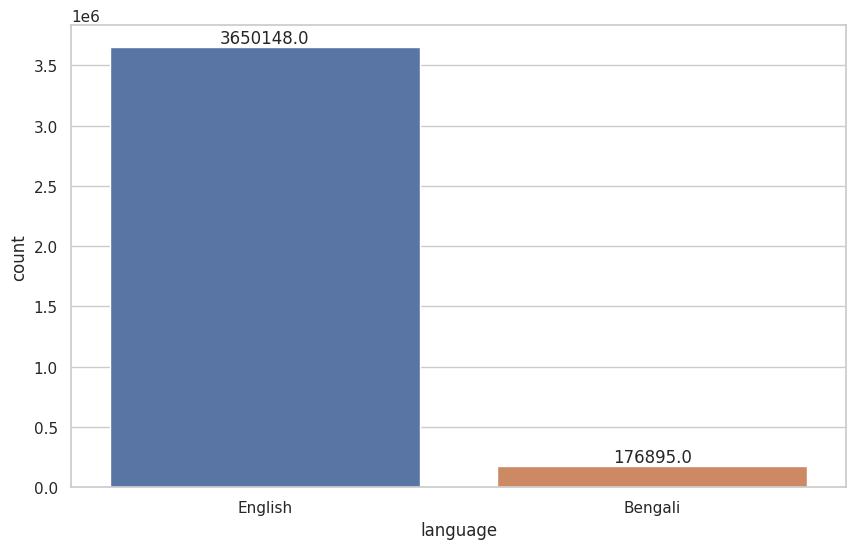

In [ ]:
# Create a countplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='language', order=df.language.value_counts().index)

# Annotate the count values above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()